In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [9]:
import tensorflow as tf

# Loading - "MNIST Data Set"

Containing Training samples=60,000,Testing Samples=10,000

Containing Training samples=60,000,Testing Samples=10,000

In [10]:
mnist=tf.keras.datasets.mnist

# After loading the MNIST data,Divide into Train and Test datasets

In [11]:
## unpacking the dataset into train and test datasets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [12]:
x_train.shape

(60000, 28, 28)

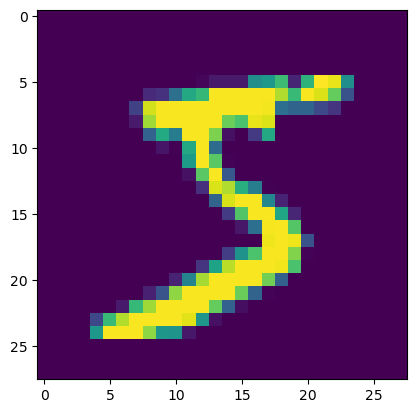

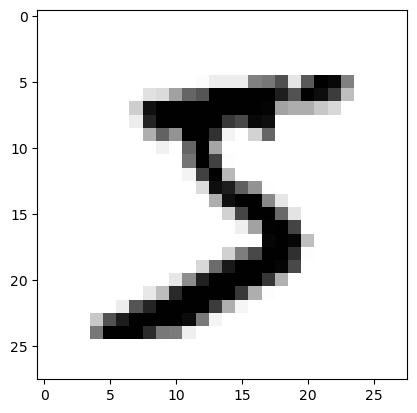

In [13]:
## just check the graph , how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
## inorder to execute the graph however we dont know whether its color image or binary images
## so inorder to plot it change the configuration
plt.imshow(x_train[0],cmap=plt.cm.binary)

# Checking the values of each pixel

# Before Normalization

In [14]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# As images are in Gray level(1 channel==>0 to 255),not Coloured(RGB)

# Normalizing the data|Pre-Processing Step

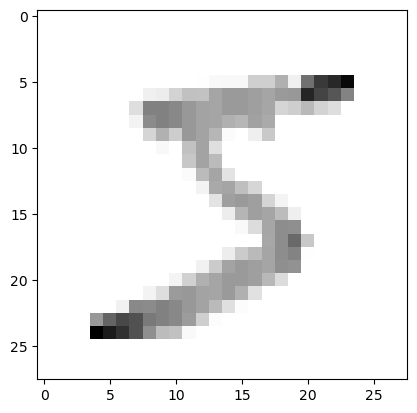

In [15]:
### you might have noticed that, its gray image and all values varies from 0 to 255
### in order to normalize it
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

# AFTER NORMALIZATION

In [16]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
print(y_train[0])

5


# Resizing image to make it suitable for apply Convolution operation

In [18]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) ## increasing one dimension for kernel=filter operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) ## increasing one dimension for kernel operation
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

# Creating a Deep Neural Network

Training on 60,000 samples of MNIST handwritten dataset



In [20]:
### Creating a neural network now

model=Sequential()


###### First Convolution layer  0 1 2 3   (60000,28,28,1)  28-3+1 = 26*26
model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu")) ## activation function to make it non-linear, <0,remove, >0
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling single maximum value of 2*2,

###### Second Convolution layer  26-3+1 = 24*24
model.add(Conv2D(64,(3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling 

###### 3rd Convolution layer
model.add(Conv2D(64,(3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2))) ## Maxpooling 


### Fully Connected Layer # 1 20*20= 400
model.add(Flatten()) ### before using fully connected layer, need to be flatten so that 20 to 10
model.add(Dense(64))
model.add(Activation("relu"))

### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

## Last Fully Connected Layer output must be equal to number of classes,10 (0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (Class probabilities)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [22]:
print("Total Training Samples=", len(x_trainr))

Total Training Samples= 60000


In [23]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [24]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3) ## Training my model

Epoch 1/5
1313/1313 [==============================] - 50s 37ms/step - loss: 0.3366 - accuracy: 0.8970 - val_loss: 0.1416 - val_accuracy: 0.9567
Epoch 2/5
1313/1313 [==============================] - 54s 41ms/step - loss: 0.1053 - accuracy: 0.9678 - val_loss: 0.0830 - val_accuracy: 0.9753
Epoch 3/5
1313/1313 [==============================] - 56s 42ms/step - loss: 0.0764 - accuracy: 0.9760 - val_loss: 0.0847 - val_accuracy: 0.9748
Epoch 4/5
1313/1313 [==============================] - 56s 43ms/step - loss: 0.0560 - accuracy: 0.9828 - val_loss: 0.0777 - val_accuracy: 0.9763
Epoch 5/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0695 - val_accuracy: 0.9793


In [25]:
### Evaluating on testing data set MNIST
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10,000 test samples", test_loss)
print("validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0644 - accuracy: 0.9808
test loss on 10,000 test samples 0.06441796571016312
validation Accuracy on 10,000 test samples 0.9807999730110168


In [26]:
predictions=model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [27]:
print(predictions)

[[1.04187882e-06 1.64780417e-04 3.89806883e-05 ... 9.99776542e-01
  5.38160521e-06 7.64166543e-06]
 [4.44412726e-04 2.88778347e-06 9.99515414e-01 ... 5.92287506e-07
  3.38036371e-05 1.11441375e-06]
 [9.37361278e-07 9.99929905e-01 7.63433945e-07 ... 1.44037067e-05
  6.13892098e-06 9.49770583e-06]
 ...
 [7.71184071e-12 5.36165778e-09 1.36815193e-09 ... 3.25861947e-07
  2.31703918e-08 3.06435754e-06]
 [1.22037374e-04 5.58798456e-06 5.53472397e-08 ... 2.64522299e-07
  8.53097299e-04 8.60054297e-06]
 [3.03507259e-05 3.94603816e-09 1.63858509e-08 ... 1.28841174e-11
  6.19880575e-06 3.07618507e-06]]


In [28]:
## in order to understand,convert the predictions from one hot encoding , we need to use numpy for that
print(np.argmax(predictions[0])) ## so actually argmax will return the maximum value index and fing the value of it

7


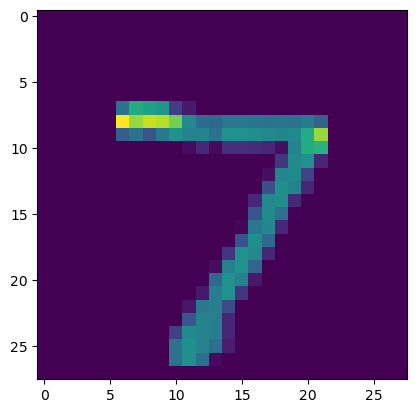

In [29]:
### now to check that is our answer is true or not
plt.imshow(x_test[0])

In [30]:
print(np.argmax(predictions[130]))

6


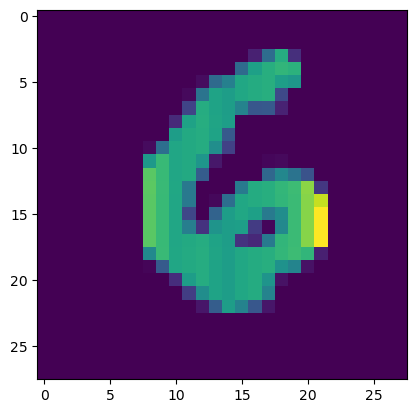

In [31]:
plt.imshow(x_test[130])

In [32]:
print(y_test[130])

6


In [48]:
import cv2

In [49]:
img=cv2.imread('zero.png')

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

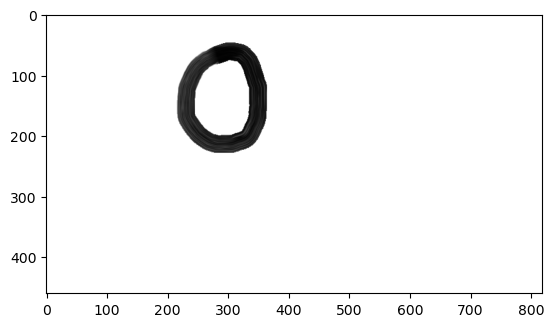

In [51]:
plt.imshow(img)
plt.show()

In [52]:
img.shape

(460, 819, 3)

In [53]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(460, 819)

In [54]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
resized.shape

(28, 28)

In [55]:
newimg=tf.keras.utils.normalize(resized,axis=1) ## 0 to 1 scaling
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1) ## kernal operation of convolution layer
newimg.shape

(1, 28, 28, 1)

In [56]:
predictions=model.predict(newimg)
print(np.argmax(predictions))

1/1 [==============================] - 0s 108ms/step
0
